## Seaborn Izgaraları

- Seaborn ızgara çağrıları, kategorik bir sütunu temel alan bir ızgarayı otomatik olarak oluşturmak için Matplotlib subplots()'u kullanır.
- Subplots için belirli sayıda sütun veya satır girmek yerine, sütun adını veririz ve seaborn otomatik olarak subplots ızgarasını eşler.
- Seaborn'un yerleşik plot çağrılarının çoğu bu ızgara sistemi üzerinde çalışır.
- Doğrudan ızgara sistemini çağırmak, kullanıcıların grafikleri yoğun bir şekilde özelleştirmesine olanak tanır.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Varsayılan seaborn temasını uygula
sns.set_theme()

## Veri

In [2]:
df = pd.read_csv('StudentsPerformance.csv')

In [3]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


## catplot()



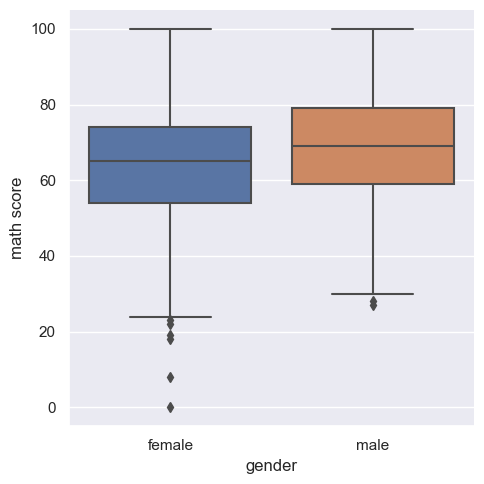

In [4]:
# kind parametresinin seçenekleri:
# “point”, “bar”, “strip”, “swarm”, “box”, “violin”, veya “boxen”
sns.catplot(x='gender',y='math score',data=df,kind='box')
plt.show()

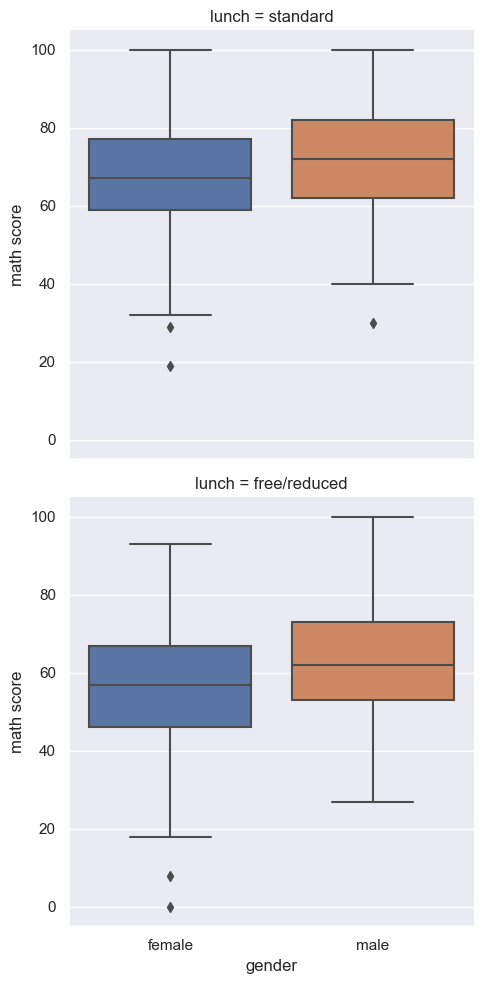

In [5]:
sns.catplot(x='gender',y='math score',data=df,kind='box',row='lunch')
plt.show()

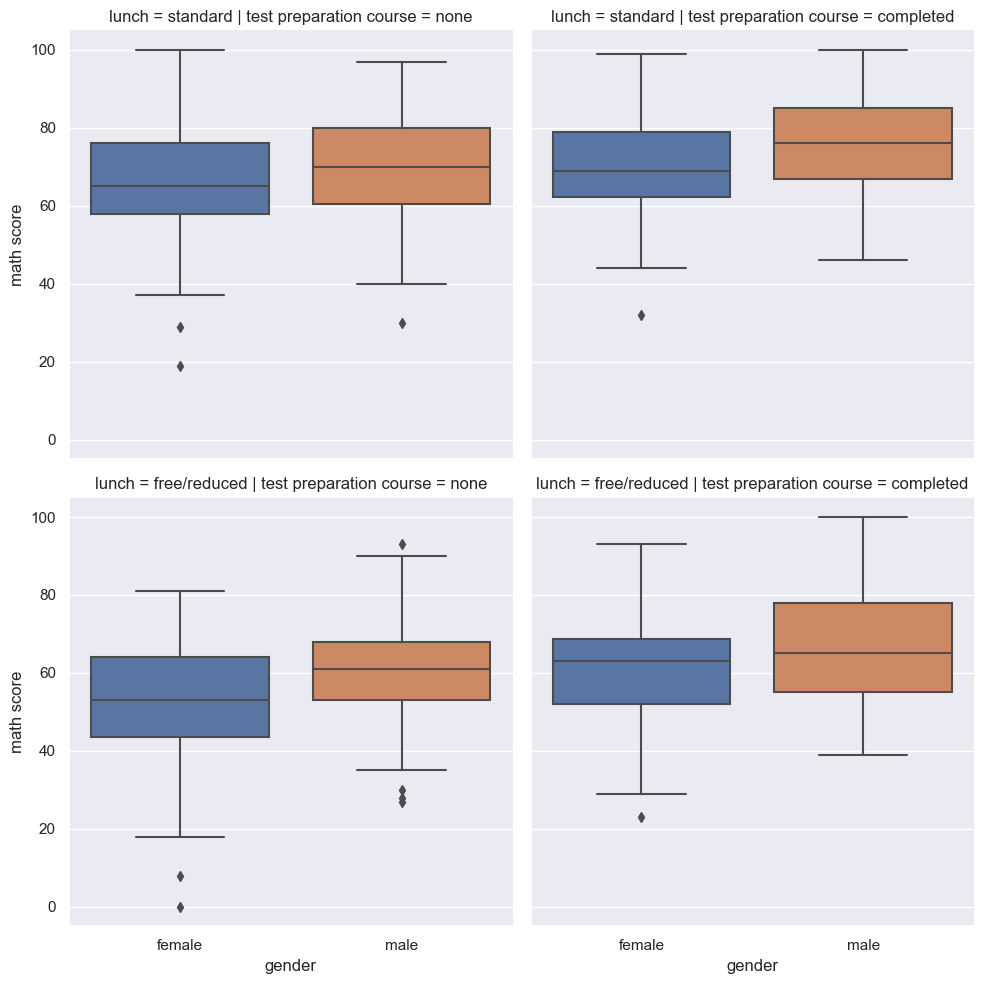

In [6]:
sns.catplot(x='gender',y='math score',data=df,kind='box',
            row='lunch',col='test preparation course')
plt.show()

## pairgrid()

pairgrid() üzerine inşa edildiği ızgara, daha önce görülen pairgrid'in yoğun şekilde özelleştirilmesine izin verir.

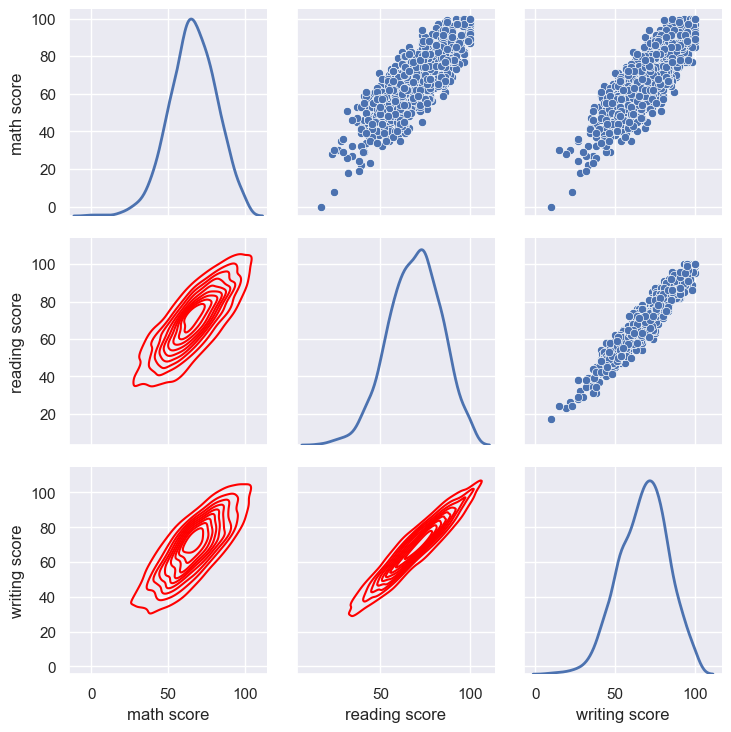

In [21]:
g = sns.PairGrid(df)
g = g.map_upper(sns.scatterplot)
g = g.map_diag(sns.kdeplot, lw=2)
g = g.map_lower(sns.kdeplot, colors="red")
plt.show()

/Users/hoze/opt/anaconda3/envs/ml/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/hoze/opt/anaconda3/envs/ml/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/hoze/opt/anaconda3/envs/ml/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level func

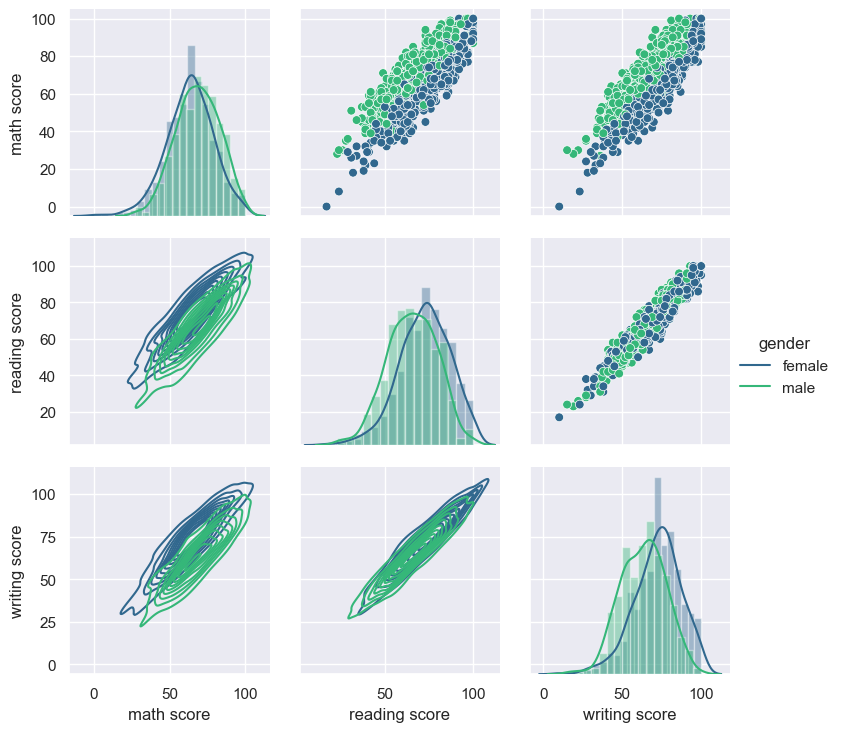

In [17]:
g = sns.PairGrid(df, hue="gender", palette="viridis",
                 hue_kws={"marker": ["o", "+"]})
g = g.map_upper(sns.scatterplot, linewidths=1, edgecolor="w", s=40)
g = g.map_diag(sns.distplot)
g = g.map_lower(sns.kdeplot)
g = g.add_legend()

plt.show()
# Uyarıyı güvenle görmezden gelin, 
# bu size kde grafiği için işaretçiyi kullanmadığını söylüyor

## FacetGrid

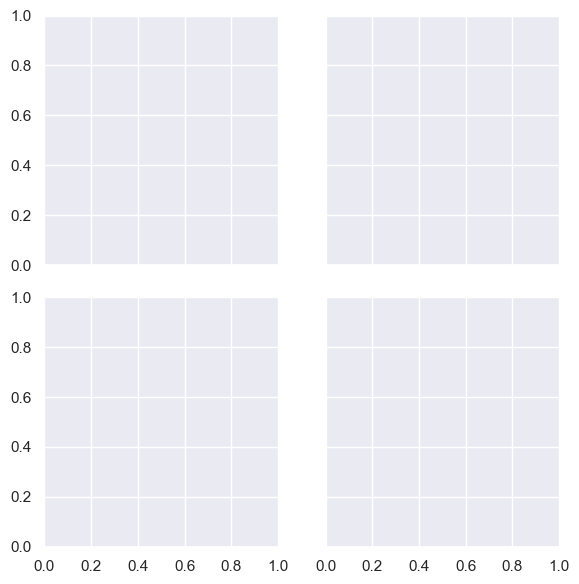

In [18]:
sns.FacetGrid(data=df,col='gender',row='lunch')
plt.show()

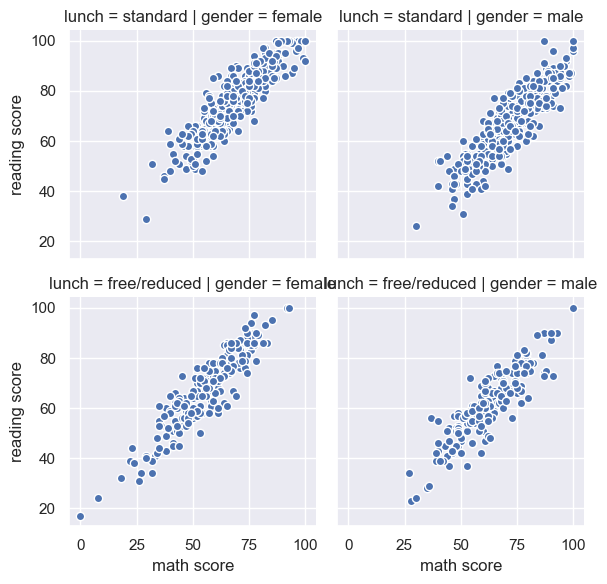

In [19]:
g = sns.FacetGrid(data=df,col='gender',row='lunch')
g = g.map(plt.scatter, "math score", "reading score", edgecolor="w")
g.add_legend()

plt.show()

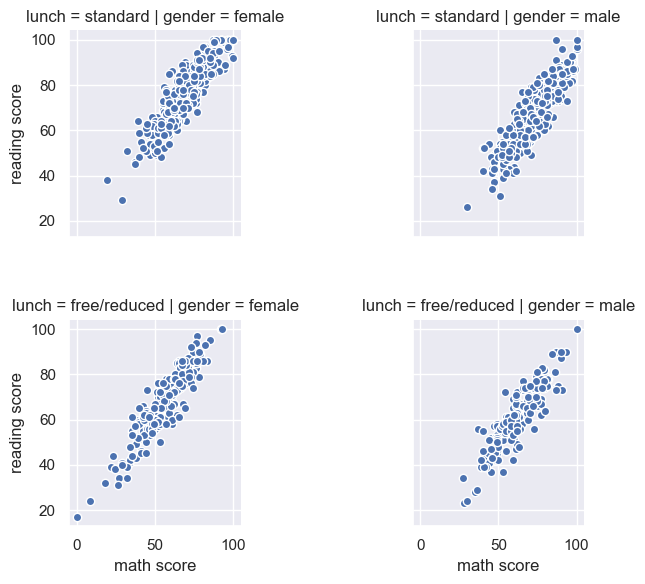

In [20]:
g = sns.FacetGrid(data=df,col='gender',row='lunch')
g = g.map(plt.scatter, "math score", "reading score", edgecolor="w")
g.add_legend()

plt.subplots_adjust(hspace=0.4, wspace=1)
plt.show()

# SON!